# CS515/Assignment 10

TOPIC: *Linear Regression, LDA and PCA*

---

# [Q1] Linear Regression

​Perform linear regression on the provided dataset `data.csv`. 
* Split the dataset into train(80%) and test(20%) sets. 
* Plot the data in a 2-D graph.
* Fit a linear model using the train set and report the estimated coefficients and intercept. 
* Generate predictions on the test set and report the coefficient of determination of the prediction.


* *Hint: Use [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)*

---

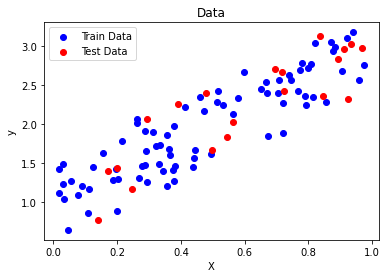

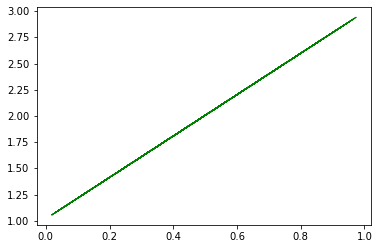



Estimated Coefficient: 1.9734941103347803
Intercept: 1.0192418104302992

Coefficient of Determination (R^2): 0.7643439835467629


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = pd.read_csv('data.csv', header=None)
# Feature
X = data.iloc[:, 0].values.reshape(-1, 1)  
# Target
y = data.iloc[:, 1].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data')
plt.legend()

model = LinearRegression()
model.fit(X_train, y_train)

plt.show()

plt.plot(X, model.predict(X), color='green', linewidth=1, label='Linear regression')
plt.show()

print("\n\nEstimated Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print("\nCoefficient of Determination (R^2):", r_squared)

# [Q2] Principal Component Analysis

Perform Principal Component Analysis (PCA) on the Iris Flower Dataset. 

* Find out the explained variance for all the components and identify the principal components.

* Use PCA to reduce the dimensionality to 3 and plot the tranformed data in a 3-D plot indicating each class.

* Use PCA to reduce the dimensionality to 2 and plot the tranformed data in a 2-D plot indicating each class.

* Report the explained variance for the first two components in both cases.

* *Hint: Use [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)*

---




Explained Variance for all components:
[0.72962445 0.22850762 0.03668922 0.00517871]


Principal Components:
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


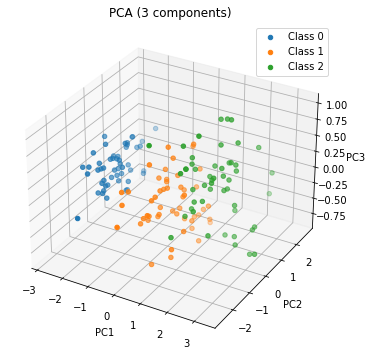

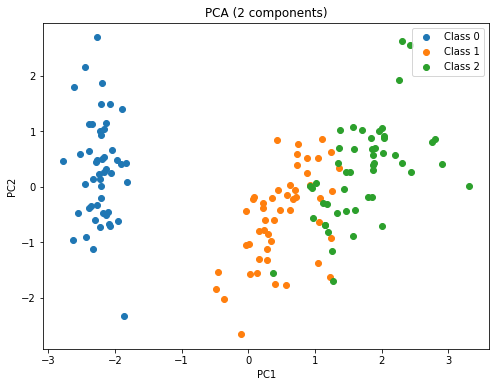



Explained Variance for the first two components:
[0.72962445 0.22850762]


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris_data = load_iris()
features = iris_data.data
targets = iris_data.target

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit PCA to the standardized data
pca_model = PCA()
pca_model.fit(scaled_features)

# Explained variance for all components
explained_variance_all = pca_model.explained_variance_ratio_
print("\n\nExplained Variance for all components:")
print(explained_variance_all)

# Identify the principal components
principal_components = pca_model.components_
print("\n\nPrincipal Components:")
print(principal_components)

# Reduce dimensionality to 3 and plot the transformed data
pca_3d = PCA(n_components=3)
features_pca_3d = pca_3d.fit_transform(scaled_features)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for i in range(3):
    ax.scatter(features_pca_3d[targets == i, 0], features_pca_3d[targets == i, 1], features_pca_3d[targets == i, 2], label=f'Class {i}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA (3 components)')
ax.legend()
plt.show()

# Reduce dimensionality to 2 and plot the transformed data
pca_2d = PCA(n_components=2)
features_pca_2d = pca_2d.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(features_pca_2d[targets == i, 0], features_pca_2d[targets == i, 1], label=f'Class {i}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA (2 components)')
plt.legend()
plt.show()

# Explained variance for the first two components
explained_variance_2d = pca_2d.explained_variance_ratio_
print("\n\nExplained Variance for the first two components:")
print(explained_variance_2d)

# [Q3] Linear Discriminant Analysis

Perform Linear Discriminant Analysis (LDA) on the Iris Flower Dataset. 

* Split the dataset into train(80%) and test(20%) sets. 

* Choose any 2 out of 4 features and use LDA to Fit the train set. Report the estimated coefficients, intercept and covariance matrix.

* Transform the data according to LDA coefficients and plot the transformed data in a 2-D graph.


* *Hint: Use [sklearn.lda.LDA](https://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html)*

---




Estimated Coefficients:
[[-5.98937381  8.39904481]
 [ 1.86898728 -4.02592145]
 [ 4.17811472 -4.38202597]]


Intercept: [  3.88512185  -0.29390659 -13.69996396]


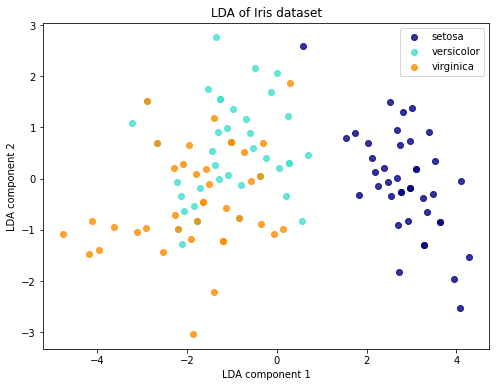

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose any 2 out of 4 features (let's choose the first two)
X_train = X_train[:, :2]
X_test = X_test[:, :2]

# Fit LDA to the train set
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Report the estimated coefficients and intercept
print("\n\nEstimated Coefficients:")
print(lda.coef_)
print("\n\nIntercept:", lda.intercept_)

# Transform the data according to LDA coefficients
X_train_lda = lda.transform(X_train)

# Plot the transformed data in a 2-D graph
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1], alpha=.8, color=color,
                label=target_name)

plt.xlabel('LDA component 1')
plt.ylabel('LDA component 2')
plt.title('LDA of Iris dataset')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

## Dataset

The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour and Virginica) with 4 attributes: sepal length, sepal width, petal length and petal width.

Use `sklearn.datasets.load_iris()` to obtain the dataset.

---

# Submission

`A10.ipynb`

---

